In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
df = pd.read_csv('../data/onehot.csv')
# drop Name Column
df.drop('Name', axis=1, inplace=True)
df

,Class,sodium,extract,alcohol,water,glycerin,glycol,acid,dimethicone,fragrance,...,tomato,pyrus,tromethamine,hedera,helix,fillers,proprietary,microcapsules,https,pinterest
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1096,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42)

In [15]:
# Decision Tree

lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [16]:
y_predicted = lr.predict(X_test)

In [17]:
accuracy_score(y_test, y_predicted)*100

93.18181818181817

In [18]:
y_predicted_train = lr.predict(X_train)
accuracy_score(y_train, y_predicted_train)*100

93.4090909090909

In [19]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[102,   3],
       [ 12, 103]], dtype=int64)

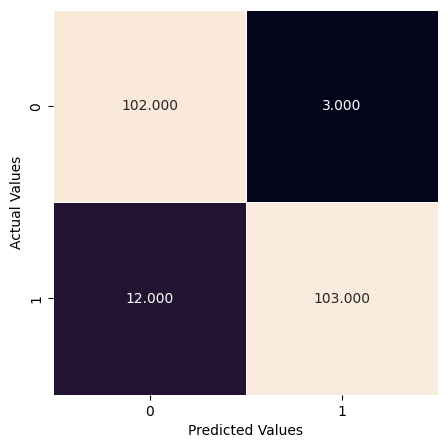

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()
